In [1]:
# import all my libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as optimize 

In [2]:
### load all the data 
# Part A datasets
Na22 = np.loadtxt('Na22_Shane.txt',skiprows = 12, max_rows = 2048)  
Co57 = np.loadtxt('Co57_Shane.txt', skiprows = 12,max_rows = 2048)  
Co60 = np.loadtxt('Co60_Shane.txt',skiprows = 12, max_rows = 2048) 
Cs137 = np.loadtxt('Cs137_Shane.txt', skiprows = 12, max_rows = 2048) 

# Part B datasets
AlFoil1 = np.loadtxt('AlFoil0.7mil_Shane.txt',skiprows = 12, max_rows = 2048)
AlFoil2 = np.loadtxt('AlFoil1mil_Shane.txt', skiprows = 12, max_rows = 2048)
Al1 = np.loadtxt('Al0.025_Shane.txt', skiprows = 12, max_rows = 2048)
Al2 = np.loadtxt('Al0.1_Shane.txt', skiprows = 12, max_rows = 2048)
Pb1 = np.loadtxt('Pb0.125_Shane.txt', skiprows = 12, max_rows = 2048)
Pb2 = np.loadtxt('Pb0.25_Shane.txt', skiprows = 12, max_rows = 2048)

## This function below was used to calculate the radiation length, penetration distance, and the amount of energy lost by $\frac{1}{e}$

In [3]:
# Radiation length function 
def RadLength(Z,A): 
    a = 1433 
    b = 11.319 
    X_0 = a * (A/(Z*(Z+1)*(b-np.log(Z))))
    return X_0 

Al_radlength = RadLength(13,26.98)

Pb_radlength = RadLength(82,207)

def fracEnergy(th,D,X_0): 
    Pen_length = X_0/D 
    th_cm = th * 2.54 
    S = (1/np.exp(1))**(th_cm/Pen_length)
    return Pen_length,S

S_AlF1 = fracEnergy(.7e-3,2.7,Al_radlength)
S_AlF2 = fracEnergy(.0001,2.7,Al_radlength)
S_Al1 = fracEnergy(.025,2.7,Al_radlength)
S_Al2 = fracEnergy(.1,2.7,Al_radlength)
S_Pb1 = fracEnergy(.125,11.4,Pb_radlength)
S_Pb2 = fracEnergy(.25,11.4,Pb_radlength)  

print(Pb_radlength,S_Pb2) # prints radiation length, pentration distance, 

#F1 = fracEnergy(.0001,2.7,Al_radlength)

6.305263225228147 (0.5530932653708901, 0.3172426093814369)


## Gaussian Fit Function is applied to each of the radioactive elements. These fits will return the average channel value. With these channel values and the energy values that correspond to these peaks can be used to find the slope as well as the y-intercept. This allows us to create a linear scale function which will convert the x-axis to energy. This way it the peaks in the graph can be observed looking at their corresponding energy values. 

## Gaussian Fit Function 

## $ f(x) = A\cdot\exp(-\frac{(x-\bar{x})^{2}}{2c^{2}}) $ , where A is the amplitude, x is data point, $\bar{x}$ is the position of the center of the peak, c is the standard deviation. 

## The Guassian Fit Function

In [4]:
def Gauss(x,a,x_bar,c): 
    return a * np.exp(-(x-x_bar)**2/(2*c**2))

# Na-22 Plot 

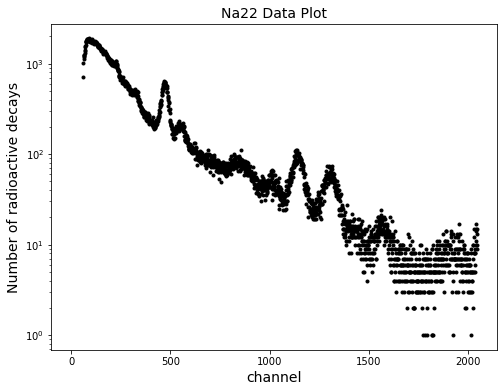

In [5]:
plt.figure(figsize = (8,6))
plt.plot(range(0,len(Na22)),Na22,'.',color = 'k')
plt.title('Na22 Data Plot',fontsize = 14)
plt.xlabel('channel',fontsize = 14)
plt.ylabel('Number of radioactive decays',fontsize = 14)
plt.yscale('log') 
plt.show()

## The Gaussian Fit for Na-22 Radioactive Element at 511 keV 

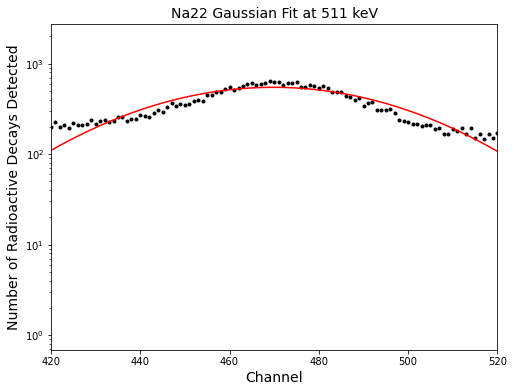

Parameter Values (a,b,c) =  [546.13398606 469.80346629  27.79979427]


In [6]:
# Gaussian Fit on the peaks: 511 keV
xwhole_Na22 = range(0,len(Na22))
ywhole_Na22 = Na22
xNa22 = xwhole_Na22[420:530]
yNa22 = ywhole_Na22[420:530]
# Range peak for 511 keV

g_Na22 = [400,471,1.5] 
Na22_Param, Na22_Err = optimize.curve_fit(Gauss,xNa22,yNa22,p0 = g_Na22) 
Na22fit = Gauss(xNa22,*Na22_Param)

plt.figure(figsize = (8,6))
plt.plot(xwhole_Na22,ywhole_Na22,'.',color = 'k')
plt.plot(xNa22,Na22fit,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Na22 Gaussian Fit at 511 keV',fontsize = 14)
plt.ylabel('Number of Radioactive Decays Detected',fontsize = 14)
plt.xlabel('Channel',fontsize = 14)
plt.yscale('log')
plt.xlim(420,520)
plt.show()
print('Parameter Values (a,b,c) = ',Na22_Param)
#print('\n',np.sqrt(Na22_Err))

# Result: $n_1$ = 469.80 $\pm$ 27.80 

## The Gaussian Fit for Na-22 Radioactive Element at 1274 keV

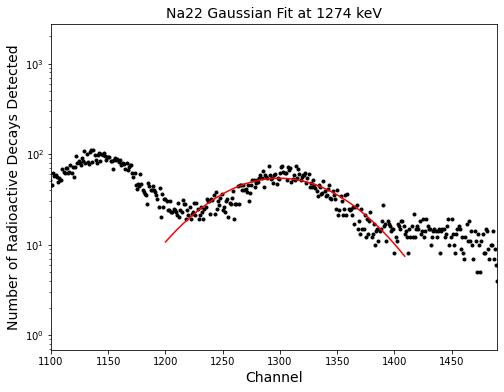

Parameter Values (a,b,c) =  [  54.04653467 1299.21470305   55.08487917]


In [7]:
# Gaussian Fit on the 1274 keV peak 

x2Na22 = xwhole_Na22[1200:1410]
y2Na22 = ywhole_Na22[1200:1410]

g2_Na22 = [10**2,1320,1.5] 
Na22_Param2, Na22_Err2 = optimize.curve_fit(Gauss,x2Na22,y2Na22,p0 = g2_Na22) 
Na22fit2 = Gauss(x2Na22,*Na22_Param2)

plt.figure(figsize = (8,6))
plt.plot(xwhole_Na22,ywhole_Na22,'.',color = 'k')
plt.plot(x2Na22,Na22fit2,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Na22 Gaussian Fit at 1274 keV',fontsize = 14)
plt.ylabel('Number of Radioactive Decays Detected',fontsize = 14)
plt.xlabel('Channel',fontsize = 14)
plt.yscale('log')
plt.xlim(1100,1490)
plt.show()

print('Parameter Values (a,b,c) = ',Na22_Param2)
#print('\n',np.sqrt(Na22_Err))

# $n_{2}$  = 1299.21 $\pm$ 55.08

# Using the Gaussian Fits from these graphs return the average channel. A straight line can be connected between these gaussian fits, which can be used to create a linear scale function. 

## The linear scale function: $ E(n) = mn + b $ 

## Formula used to find slope: m = $\frac{E_{2}-E_{1}}{n_{2}-n_{1}}$   
### In the case for Sodium-22, $ E_{2} = 1274 keV$, $ E_{1} = 511 keV$, $n_{2} \approx $ 1299.21, $n_1 \approx 469.80 $ 

### m = $\frac{E_{2}-E_{1}}{n_{2}-n_{1}} = \frac{1274~keV - 511~keV}{1299.21 - 469.80}$ = .920 keV/channel

### b = $E_{2} - mn_{2} = 1274~keV - (.920~\frac{keV}{channel})(1299.21~channel) = 78.72 ~keV$  

## Sodium-22 Propagation Error Analysis 

# Sodium-22 Linear Scale Conversion Plot 

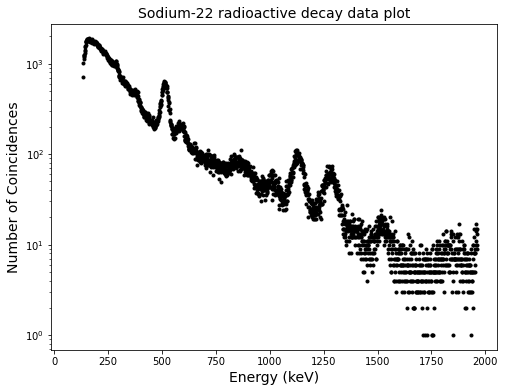

In [8]:
def linfun(n,m,b):
    return m*n + b

#arrNa22 = np.array(xwhole_Na22)
n_array = np.arange(0,len(Na22))
Na22_energy = linfun(n_array,.920,78.7)

plt.figure(figsize = (8,6))
plt.plot(Na22_energy,ywhole_Na22,'.',color = 'k')
plt.title('Sodium-22 radioactive decay data plot',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')

#plt.text(480,740,'511 keV')
#plt.text(125)

#plt.legend(loc = 'upper right',fontsize = 12)
plt.show()

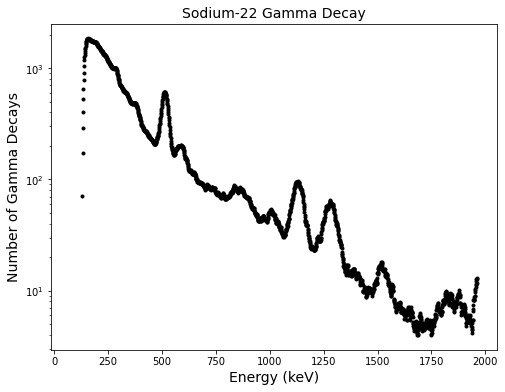

In [67]:
## The Running Average of Sodium-22 Plot

# Complete a running average 
r = 5 
ravg_Na22 = [] 
for idx in range(0,2048,1): # Counts up to 600 points 
    if idx == 0: 
        ravg_Na22.append(np.average(Na22[0:idx+r])) 
    elif idx == 1: 
        ravg_Na22.append(np.average(Na22[idx-1:idx+r]))
    elif idx == 2: 
        ravg_Na22.append(np.average(Na22[idx-2:idx+r]))
    elif idx == 3: 
        ravg_Na22.append(np.average(Na22[idx-3:idx+r]))
    elif idx == 4: 
        ravg_Na22.append(np.average(Na22[idx-4:idx+r]))
    elif idx == 2043: 
        ravg_Na22.append(np.average(Na22[idx-r:idx+4]))
    elif idx == 2044: 
        ravg_Na22.append(np.average(Na22[idx-r:idx+3]))
    elif idx == 2045: 
        ravg_Na22.append(np.average(Na22[idx-r:idx+2]))
    elif idx == 2046: 
        ravg_Na22.append(np.average(Na22[idx-r:idx+1]))
    elif idx == 2047: 
        ravg_Na22.append(np.average(Na22[idx-r:idx]))
    else: 
        ravg_Na22.append(np.average(Na22[idx-r:idx+r]))


# plot the running average 
plt.figure(figsize = (8,6))
plt.plot(Co57_energy,ravg_Na22,'.',color = 'k')
plt.title('Sodium-22 Gamma Decay',fontsize = 14)
plt.ylabel('Number of Gamma Decays',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')
#plt.xlim(0,300)
plt.show() 

# Gaussian Fit for Sodium-22 Linear Scale Conversion Plot at 511 keV

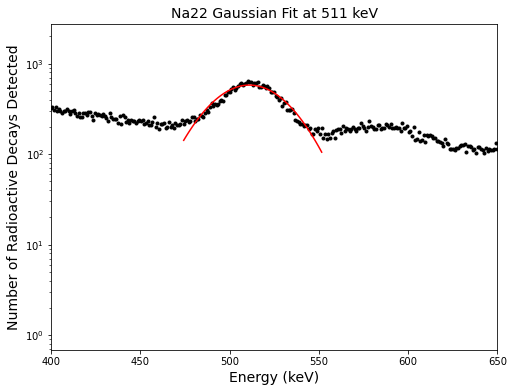

Parameter Values (a,b,c) =  [578.21994688 511.06810726  21.92405896]


In [9]:
# Gaussian Fit on the peaks: 511 keV

x_eGfit1_Na22 = Na22_energy[430:515]  
y_eGfit1_Na22 = ywhole_Na22[430:515]
# Range peak for 511 keV

eNa22_Gfit1 = [800,520,2] 
eNa22_Param1, eNa22_Err1 = optimize.curve_fit(Gauss,x_eGfit1_Na22,y_eGfit1_Na22,p0 = eNa22_Gfit1) 
eNa22fit1 = Gauss(x_eGfit1_Na22,*eNa22_Param1)

plt.figure(figsize = (8,6))
plt.plot(Na22_energy,ywhole_Na22,'.',color = 'k')
plt.plot(x_eGfit1_Na22,eNa22fit1,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Na22 Gaussian Fit at 511 keV',fontsize = 14)
plt.ylabel('Number of Radioactive Decays Detected',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,650)
plt.show()
print('Parameter Values (a,b,c) = ',eNa22_Param1)
#print('\n',np.sqrt(Na22_Err))

# Result: $E_{1} = 511.07 \pm 21.92 $ 

# Gaussian Fit for Sodium-22 Linear Scale Conversion Plot at 1274 keV

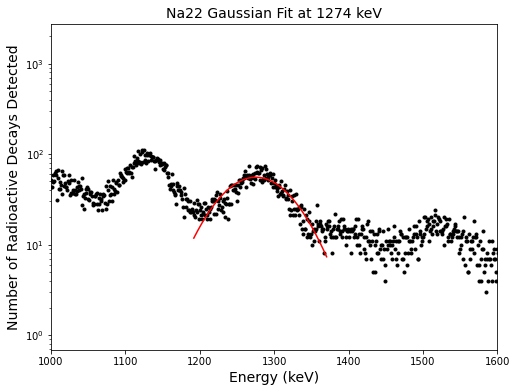

Parameter Values (a,b,c) =  [  55.42654596 1275.18760395   47.31589739]


In [10]:
# Gaussian Fit on the peaks: 1274 keV

x_eGfit2_Na22 = Na22_energy[1210:1405]  
y_eGfit2_Na22 = ywhole_Na22[1210:1405]
# Range peak for 511 keV

eNa22_Gfit2 = [90,1290,1.5] 
eNa22_Param2, eNa22_Err2 = optimize.curve_fit(Gauss,x_eGfit2_Na22,y_eGfit2_Na22,p0 = eNa22_Gfit2) 
eNa22fit2 = Gauss(x_eGfit2_Na22,*eNa22_Param2)

plt.figure(figsize = (8,6))
plt.plot(Na22_energy,ywhole_Na22,'.',color = 'k')
plt.plot(x_eGfit2_Na22,eNa22fit2,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Na22 Gaussian Fit at 1274 keV',fontsize = 14)
plt.ylabel('Number of Radioactive Decays Detected',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(1000,1600)
plt.show()
print('Parameter Values (a,b,c) = ',eNa22_Param2)
#print('\n',np.sqrt(Na22_Err))

# Result: $E_{2} = 1275.19 \pm 47.32 $ 

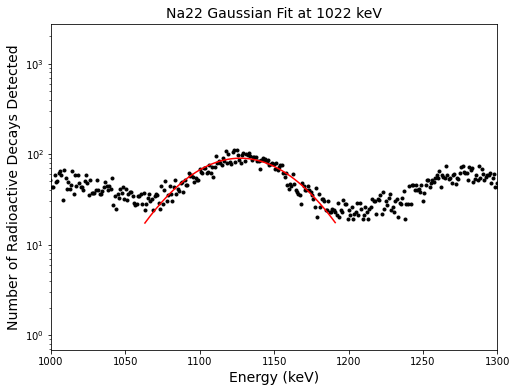

Parameter Values (a,b,c) =  [  89.91999348 1127.14673655   35.2632655 ]


In [58]:
# Gaussian Fit on the peaks: 1022 keV

x_eGfit3_Na22 = Na22_energy[1070:1210]  
y_eGfit3_Na22 = ywhole_Na22[1070:1210]

eNa22_Gfit3 = [100,1145,.8] 
eNa22_Param3, eNa22_Err3 = optimize.curve_fit(Gauss,x_eGfit3_Na22,y_eGfit3_Na22,p0 = eNa22_Gfit3) 
eNa22fit3 = Gauss(x_eGfit3_Na22,*eNa22_Param3)

plt.figure(figsize = (8,6))
plt.plot(Na22_energy,ywhole_Na22,'.',color = 'k')
plt.plot(x_eGfit3_Na22,eNa22fit3,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Na22 Gaussian Fit at 1022 keV',fontsize = 14)
plt.ylabel('Number of Radioactive Decays Detected',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(1000,1300)
plt.show()
print('Parameter Values (a,b,c) = ',eNa22_Param3)
#print('\n',np.sqrt(Na22_Err))

## Measured Energy peak at 1022 keV is $1127.15 \pm 35.26 ~ keV$  

# Labeled Sodium-22 Linear Scale Conversion Plot 

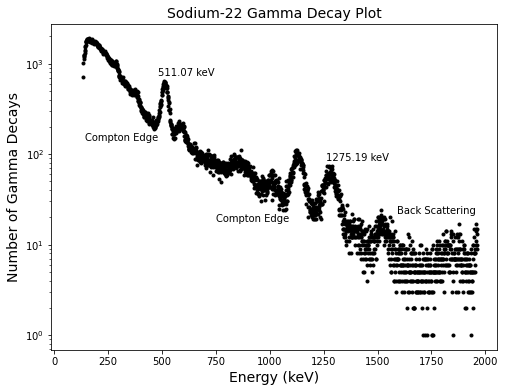

In [249]:
plt.figure(figsize = (8,6))
plt.plot(Na22_energy,ywhole_Na22,'.',color = 'k')
plt.title('Sodium-22 Gamma Decay Plot',fontsize = 14)
plt.ylabel('Number of Gamma Decays',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')

plt.text(480,740,'511.07 keV')
plt.text(1260,85,'1275.19 keV') 
plt.text(1590,22, "Back Scattering")
plt.text(140,140,'Compton Edge')
plt.text(750,18,'Compton Edge')

# More labels required for backscattering, compton shift, etc?

# Save the plot 
plt.savefig('Na22_GammaDecay_Plot')
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Since the channels remain constant throughout all these experiments. The linear scale function found from the Sodium-22 Plot is the same for all sources. Therefore, I will apply the linear scale function to each dataset. 

# Cobalt-57 Linear Scale Conversion Plot

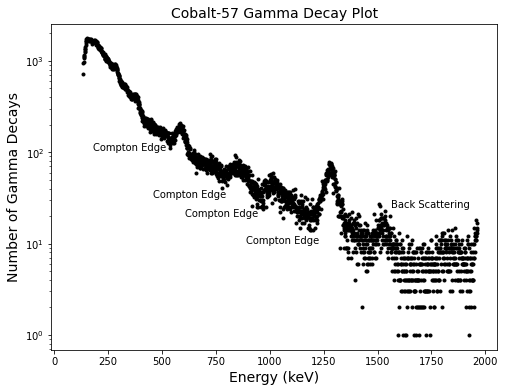

In [248]:
n_array_Co57 = np.arange(0,len(Co57))
Co57_energy = linfun(n_array_Co57,.920,78.7)

plt.figure(figsize = (8,6))
plt.plot(Co57_energy,Co57,'.',color = 'k')
plt.title('Cobalt-57 Gamma Decay Plot',fontsize = 14)
plt.ylabel('Number of Gamma Decays',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')

plt.text(1560,25,'Back Scattering')
plt.text(180,105,'Compton Edge')
plt.text(605,20,'Compton Edge')
plt.text(890,10,'Compton Edge')
plt.text(460,32,'Compton Edge')
# More labels required for backscattering, compton shift, etc? 

# Save a plot
plt.savefig('Co57_GammaDecay_Plot')
plt.show()

# There is suppose to be a peak that you see at 122 keV for Cobalt-57, but I am not seeing this here. 

## For Cobalt-57, a peak is supposed to be seen at 122 keV. However, this was not seen, so to achieve a better look at this phenomenon, I am going to apply a running average.  

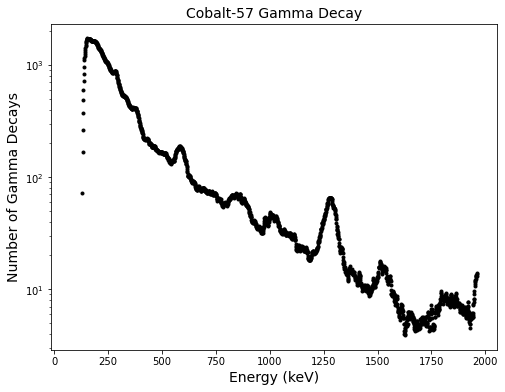

In [13]:
# Complete a running average 
r = 5 
ravg_Co57 = [] 
for idx in range(0,2048,1): # Counts up to 600 points 
    if idx == 0: 
        ravg_Co57.append(np.average(Co57[0:idx+r])) 
    elif idx == 1: 
        ravg_Co57.append(np.average(Co57[idx-1:idx+r]))
    elif idx == 2: 
        ravg_Co57.append(np.average(Co57[idx-2:idx+r]))
    elif idx == 3: 
        ravg_Co57.append(np.average(Co57[idx-3:idx+r]))
    elif idx == 4: 
        ravg_Co57.append(np.average(Co57[idx-4:idx+r]))
    elif idx == 2043: 
        ravg_Co57.append(np.average(Co57[idx-r:idx+4]))
    elif idx == 2044: 
        ravg_Co57.append(np.average(Co57[idx-r:idx+3]))
    elif idx == 2045: 
        ravg_Co57.append(np.average(Co57[idx-r:idx+2]))
    elif idx == 2046: 
        ravg_Co57.append(np.average(Co57[idx-r:idx+1]))
    elif idx == 2047: 
        ravg_Co57.append(np.average(Co57[idx-r:idx]))
    else: 
        ravg_Co57.append(np.average(Co57[idx-r:idx+r]))


# plot the running average 
plt.figure(figsize = (8,6))
plt.plot(Co57_energy,ravg_Co57,'.',color = 'k')
plt.title('Cobalt-57 Gamma Decay',fontsize = 14)
plt.ylabel('Number of Gamma Decays',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')
#plt.xlim(0,300)
plt.show()

# Cobalt-60 Linear Scale Conversion Plot

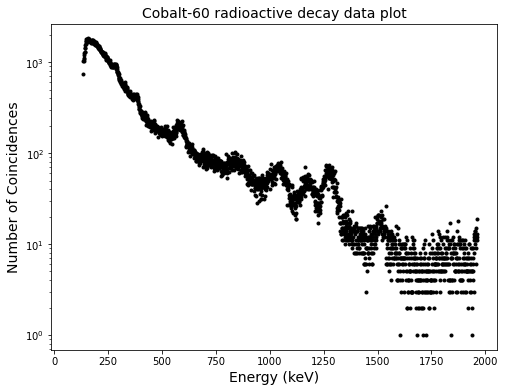

In [14]:
n_array_Co60 = np.arange(0,len(Co60))
Co60_energy = linfun(n_array_Co60,.920,78.7)

plt.figure(figsize = (8,6))
plt.plot(Co60_energy,Co60,'.',color = 'k')
plt.title('Cobalt-60 radioactive decay data plot',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')

#plt.xlim(0,500)
#plt.text(480,740,'511.07 keV')
#plt.text(1260,85,'1275.19 keV') 

# More labels required for backscattering, compton shift, etc? 
#plt.xlim(1200,1350)
# Save the plot 
# plt.savefig('HydrogenEmissionSpectra')
plt.show()

## Gaussian Fit for Cobalt-60 at peak 1173 keV

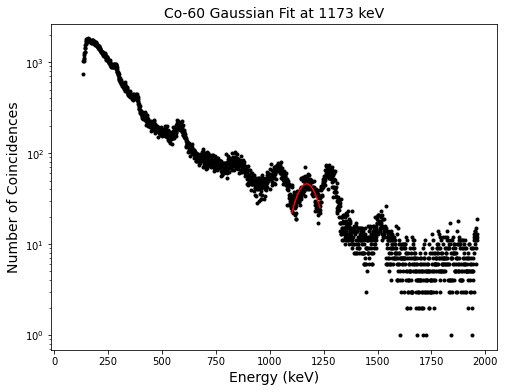

Parameter Values (a,b,c) =  [  45.97455859 1170.44232932   56.26491587]


In [15]:
# Gaussian Fit for peak 662 keV 

x_Co60fit1 = Co60_energy[1112:1255]  
y_Co60fit1 = Co60[1112:1255]
# Range peak for 511 keV

Co60_fit1_guess = [910,1180,1.5] 
Co60_Param1, Co60_Err1 = optimize.curve_fit(Gauss,x_Co60fit1,y_Co60fit1,p0 = Co60_fit1_guess) 
Co60fit1 = Gauss(x_Co60fit1,*Co60_Param1)

plt.figure(figsize = (8,6))
plt.plot(Co60_energy,Co60,'.',color = 'k')
plt.plot(x_Co60fit1,Co60fit1,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Co-60 Gaussian Fit at 1173 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
#plt.xlim(800,1400)
plt.show()
print('Parameter Values (a,b,c) = ',Co60_Param1)
#print('\n',np.sqrt(Na22_Err))

# The Result: $E_{1} = 1170.44 \pm 56.26 ~keV$ 

## Gaussian Fit for Cobalt-60 at peak 1333 keV

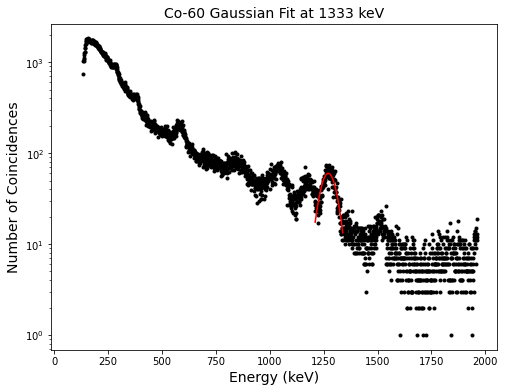

Parameter Values (a,b,c) =  [  60.0666764  1271.13692923   38.65213519]


In [16]:
# Gaussian Fit for peak 1333 keV 

x_Co60fit2 = Co60_energy[1230:1370]  
y_Co60fit2 = Co60[1230:1370]

Co60_fit2_guess = [102,1280,1] 
Co60_Param2, Co60_Err2 = optimize.curve_fit(Gauss,x_Co60fit2,y_Co60fit2,p0 = Co60_fit2_guess) 
Co60fit2 = Gauss(x_Co60fit2,*Co60_Param2)

plt.figure(figsize = (8,6))
plt.plot(Co60_energy,Co60,'.',color = 'k')
plt.plot(x_Co60fit2,Co60fit2,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Co-60 Gaussian Fit at 1333 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
#plt.xlim(1000,1600)
plt.show()
print('Parameter Values (a,b,c) = ',Co60_Param2)
#print('\n',np.sqrt(Na22_Err))

# $E_{2}$ = 1271.14 $\pm$ 38.65 keV

## Labeled Co-60 Plot

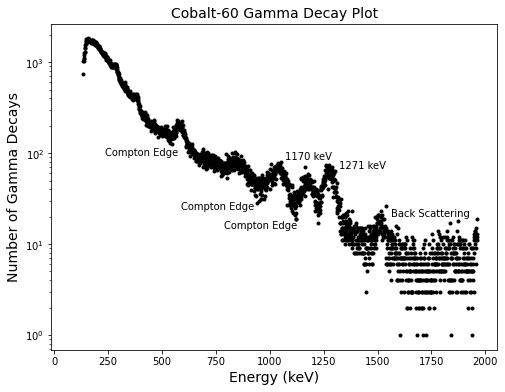

In [208]:
plt.figure(figsize = (8,6))
plt.plot(Co60_energy,Co60,'.',color = 'k')
plt.title('Cobalt-60 Gamma Decay Plot',fontsize = 14)
plt.ylabel('Number of Gamma Decays',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')

plt.text(1070,85,'1170 keV') 
plt.text(1320,68,'1271 keV') 
plt.text(1560,20,'Back Scattering')
plt.text(788,15, 'Compton Edge')
plt.text(588,24, 'Compton Edge')
plt.text(233,95, 'Compton Edge')

# More labels required for backscattering, compton shift, etc? 

# Save the plot 
plt.savefig('Co-60_GammaDecay_Plot')
plt.show()

# Result: $E_{2} = 1271.14 \pm 38.65~keV$ 

# Cesium-137 Linear Scale Conversion Plot

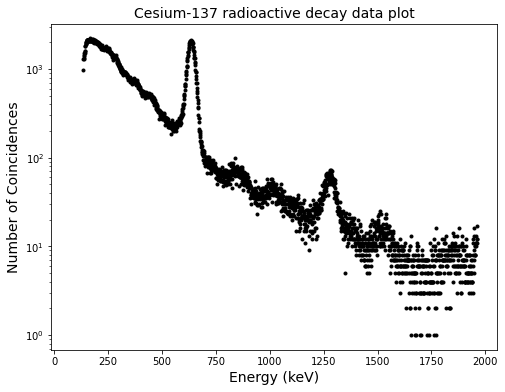

In [18]:
n_array_Cs137 = np.arange(0,len(Cs137))
Cs137_energy = linfun(n_array_Cs137,.920,78.7)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energy,Cs137,'.',color = 'k')
plt.title('Cesium-137 radioactive decay data plot',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')

#plt.xlim(0,500)
#plt.text(480,740,'511.07 keV')
#plt.text(1260,85,'1275.19 keV') 

# More labels required for backscattering, compton shift, etc? 

# Save the plot 
# plt.savefig('HydrogenEmissionSpectra')
plt.show()

# Gaussian Fit for Cesium-137 at 662 keV

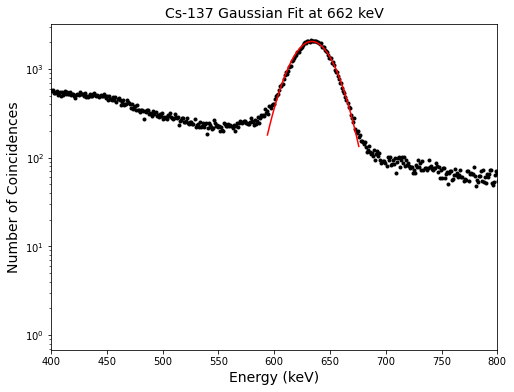

Parameter Values (a,b,c) =  [2046.79006173  633.65326805   18.03947322]


In [19]:
# Gaussian Fit for peak 662 keV 

x_Cs137fit1 = Cs137_energy[560:650]  
y_Cs137fit1 = Cs137[560:650]
# Range peak for 511 keV

Cs137_fit1_guess = [1130,640,3] 
Cs137_Param1, Cs137_Err1 = optimize.curve_fit(Gauss,x_Cs137fit1,y_Cs137fit1,p0 = Cs137_fit1_guess) 
Cs137fit1 = Gauss(x_Cs137fit1,*Cs137_Param1)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energy,Cs137,'.',color = 'k')
plt.plot(x_Cs137fit1,Cs137fit1,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Cs-137 Gaussian Fit at 662 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,800)
plt.show()
print('Parameter Values (a,b,c) = ',Cs137_Param1)
#print('\n',np.sqrt(Na22_Err))

# Result: $E = 633.65 \pm 18.04~keV$ 
### This shows the average energy for peak 662 keV along with its uncertainty value which comes from the standard devation of the Gaussian Fit. 

## Labeled Cesium-137 Plot

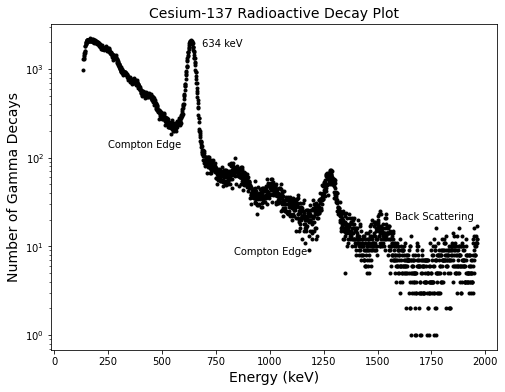

In [177]:
plt.figure(figsize = (8,6))
plt.plot(Cs137_energy,Cs137,'.',color = 'k')
plt.title('Cesium-137 Radioactive Decay Plot',fontsize = 14)
plt.ylabel('Number of Gamma Decays',fontsize  = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.yscale('log')

plt.text(685,1800,'634 keV') 
plt.text(1580,20,'Back Scattering')
plt.text(250,130,'Compton Edge')
plt.text(835,8,'Compton Edge')

# More labels required for backscattering, compton shift, etc? 

# Save the plot 
plt.savefig('Cs137_GammaDecay_Plot')
plt.show()

# Part B Data Analysis

## This step of the data analysis is to find the average energy at peak 662 keV and compare it to $ S = (\frac{1}{e})^{\frac{t_{h}}{d}}$, where $t_h$ is the thickness of the material and d is the penetration distance. 

## For Part B recorded 20 min datasets with 6 different absorbers. The radioactive element used was Cesium-137 which has a 662 keV peak  By plotting these graphs we will apply gaussian fits at the 662 keV. The idea is to compare the calculated result to the experimentally measured result. The experimentally measured result is obtained from the gaussian fit at the 662 keV peak. The calculated result is obtained using formula S. However, this formula calculates the amount of energy it retains from its initial energy by a factor of $ \frac{1}{e}$. So, to compare the experimental result, we need to compute S * 662 keV which will give the amount of energy at peak 662. 

## Scatter Plot of Cs137 for 0.7 mill Aluminum Foil 

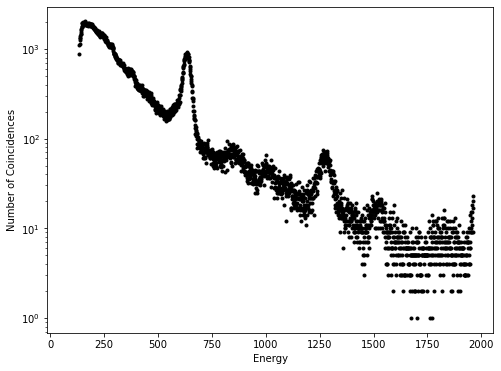

In [21]:
# Apply linear scale function 
n_array_Cs137AF1 = np.arange(0,len(AlFoil1))
Cs137_energyAF1 = linfun(n_array_Cs137AF1,.920,78.7)

plt.figure(figsize = (8,6))
plt.yscale('log')
plt.xlabel('Energy')
plt.ylabel('Number of Coincidences') 
plt.plot(Cs137_energyAF1,AlFoil1,'.',color ='k')
plt.show()

## Gaussian Fit for .7 mill Aluminum Foil at peak 662 keV

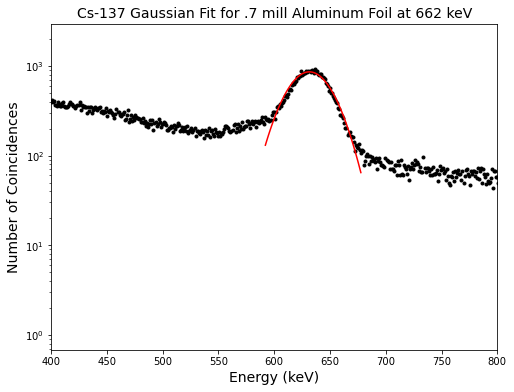

Parameter Values (a,b,c) =  [857.13970087 631.45339634  20.30137175]


In [22]:
x_Cs137_AF1 = Cs137_energyAF1[558:652]  
y_Cs137_AF1 = AlFoil1[558:652]
# Range peak for 511 keV

guessAlF1 = [1150,660,1.2] 
AlF1_Param, AlF1_Err = optimize.curve_fit(Gauss,x_Cs137_AF1,y_Cs137_AF1,p0 = guessAlF1) 
AlF1fit = Gauss(x_Cs137_AF1,*AlF1_Param)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energyAF1,AlFoil1,'.',color = 'k')
plt.plot(x_Cs137_AF1,AlF1fit,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Cs-137 Gaussian Fit for .7 mill Aluminum Foil at 662 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,800)
plt.show()
print('Parameter Values (a,b,c) = ',AlF1_Param)

### Experimentally Measured Result: E = 631.45 $\pm$ 20.30 keV

## Scatter Plot of Cs137 for 1.0 mill Aluminum Foil 

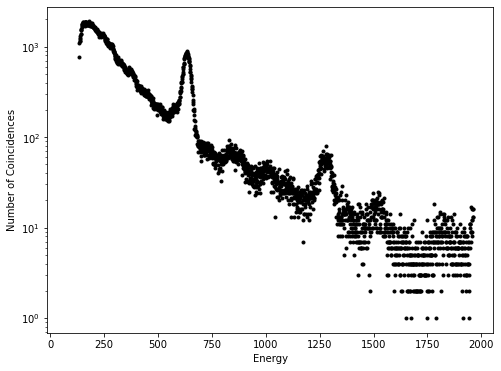

In [23]:
# Apply linear scale function 
n_array_Cs137AF2 = np.arange(0,len(AlFoil2))
Cs137_energyAF2 = linfun(n_array_Cs137AF2,.920,78.7)

plt.figure(figsize = (8,6))
plt.yscale('log')
plt.xlabel('Energy')
plt.ylabel('Number of Coincidences') 
plt.plot(Cs137_energyAF2,AlFoil2,'.',color ='k')
plt.show()

## Gaussian Fit for 1.0 mill Aluminum Foil at peak 662 keV

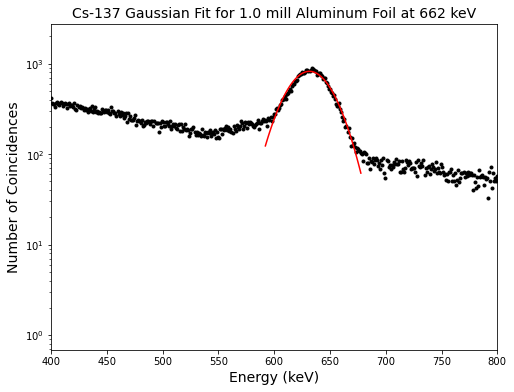

Parameter Values (a,b,c) =  [822.02424849 631.51842419  20.25102301]


In [24]:
x_Cs137_AF2 = Cs137_energyAF2[558:652]  
y_Cs137_AF2 = AlFoil2[558:652]
# Range peak for 511 keV

guessAlF2 = [1010,660,1.2] 
AlF2_Param, AlF2_Err = optimize.curve_fit(Gauss,x_Cs137_AF2,y_Cs137_AF2,p0 = guessAlF2) 
AlF2fit = Gauss(x_Cs137_AF2,*AlF2_Param)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energyAF2,AlFoil2,'.',color = 'k')
plt.plot(x_Cs137_AF2,AlF2fit,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Cs-137 Gaussian Fit for 1.0 mill Aluminum Foil at 662 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,800)
plt.show()
print('Parameter Values (a,b,c) = ',AlF2_Param)

## Experimental Result: E = 631. 52 $\pm$ 20.25 keV 

## Scatter Plot of Cs137 for .025 inch Aluminum 

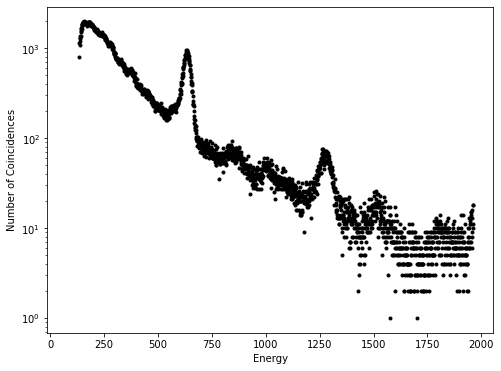

In [25]:
n_array_Cs137A1 = np.arange(0,len(Al1))
Cs137_energyA1 = linfun(n_array_Cs137A1,.920,78.7)

plt.figure(figsize = (8,6))
plt.yscale('log')
plt.xlabel('Energy')
plt.ylabel('Number of Coincidences') 
plt.plot(Cs137_energyA1,Al1,'.',color ='k')
plt.show()

## Gaussian Fit for .025 inch Aluminum at peak 662 keV

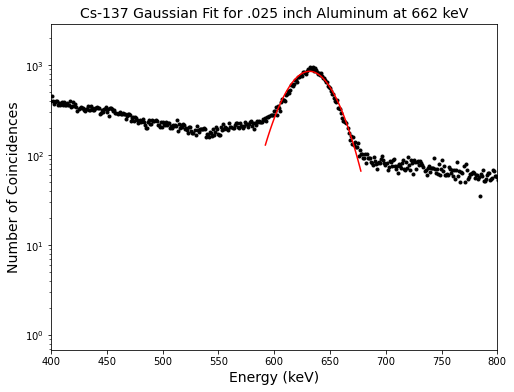

Parameter Values (a,b,c) =  [858.48018157 631.61115494  20.35404219]


In [26]:
x_Cs137_A1 = Cs137_energyA1[558:652]  
y_Cs137_A1 = Al1[558:652]
# Range peak for 511 keV

guessA1 = [1000,650,1.2] 
A1_Param, A1_Err = optimize.curve_fit(Gauss,x_Cs137_A1,y_Cs137_A1,p0 = guessA1) 
A1fit = Gauss(x_Cs137_A1,*A1_Param)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energyA1,Al1,'.',color = 'k')
plt.plot(x_Cs137_A1,A1fit,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Cs-137 Gaussian Fit for .025 inch Aluminum at 662 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,800)
plt.show()
print('Parameter Values (a,b,c) = ',A1_Param)

## Experimental Result: E = 631.61 $\pm$ 20.35 keV

## Scatter Plot of Cs137 for .1 inch Aluminum 

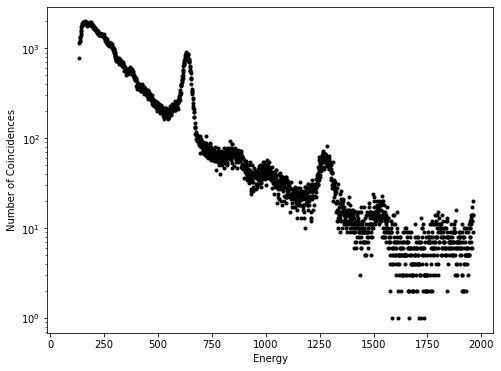

In [27]:
n_array_Cs137A2 = np.arange(0,len(Al2))
Cs137_energyA2 = linfun(n_array_Cs137A2,.920,78.7)

plt.figure(figsize = (8,6))
plt.yscale('log')
plt.xlabel('Energy')
plt.ylabel('Number of Coincidences') 
plt.plot(Cs137_energyA2,Al2,'.',color ='k')
plt.show()

## Gaussian Fit for .1 inch Aluminum at peak 662 keV

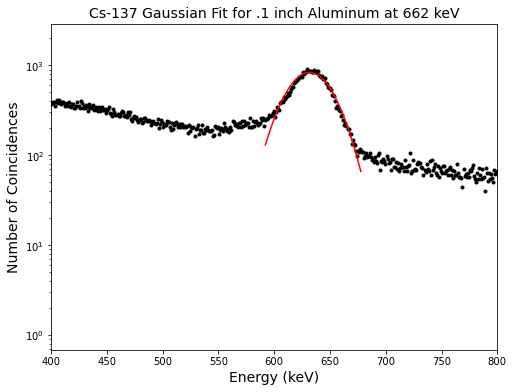

Parameter Values (a,b,c) =  [837.38717724 631.51647946  20.44578849]


In [28]:
x_Cs137_A2 = Cs137_energyA2[558:652]  
y_Cs137_A2 = Al2[558:652]
# Range peak for 511 keV

guessA2 = [950,645,1.2] 
A2_Param, A2_Err = optimize.curve_fit(Gauss,x_Cs137_A2,y_Cs137_A2,p0 = guessA2) 
A2fit = Gauss(x_Cs137_A2,*A2_Param)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energyA2,Al2,'.',color = 'k')
plt.plot(x_Cs137_A2,A2fit,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Cs-137 Gaussian Fit for .1 inch Aluminum at 662 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,800)
plt.show()
print('Parameter Values (a,b,c) = ',A2_Param)

## Experimental Result: E = 631.52 $\pm$ 20.45 keV

## Scatter Plot of Cs137 for .125 inch Lead 

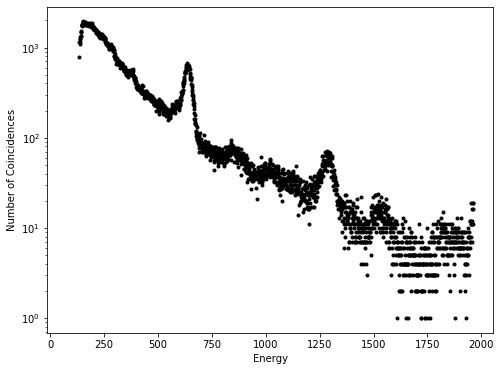

In [29]:
n_array_Cs137Pb1 = np.arange(0,len(Pb1))
Cs137_energyPb1 = linfun(n_array_Cs137Pb1,.920,78.7)

plt.figure(figsize = (8,6))
plt.yscale('log')
plt.xlabel('Energy')
plt.ylabel('Number of Coincidences') 
plt.plot(Cs137_energyPb1,Pb1,'.',color ='k')
plt.show()

## Gaussian Fit for .125 Lead at peak 662 keV

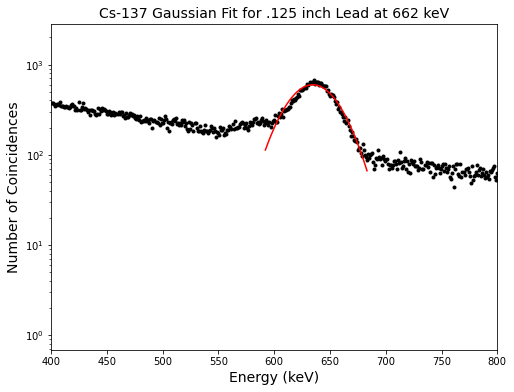

Parameter Values (a,b,c) =  [596.54643278 634.45864448  23.22178307]


In [30]:
x_Cs137_Pb1 = Cs137_energyPb1[558:658]  
y_Cs137_Pb1 = Pb1[558:658]
# Range peak for 511 keV

guessPb1 = [970,650,1.2] 
Pb1_Param, Pb1_Err = optimize.curve_fit(Gauss,x_Cs137_Pb1,y_Cs137_Pb1,p0 = guessPb1) 
Pb1fit = Gauss(x_Cs137_Pb1,*Pb1_Param)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energyPb1,Pb1,'.',color = 'k')
plt.plot(x_Cs137_Pb1,Pb1fit,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Cs-137 Gaussian Fit for .125 inch Lead at 662 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,800)
plt.show()
print('Parameter Values (a,b,c) = ',Pb1_Param)

## Experimental Result: E = 634.46 $\pm$ 23.22 keV 

## Scatter Plot of Cs137 for .25 inch Lead 

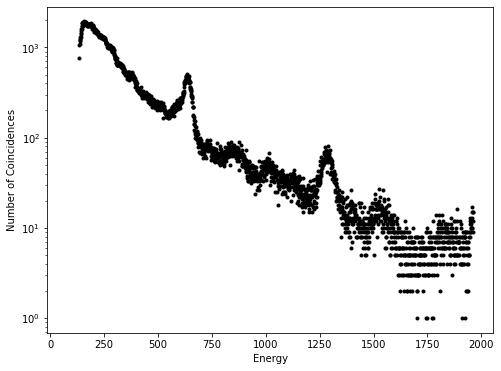

In [31]:
n_array_Cs137Pb2 = np.arange(0,len(Pb2))
Cs137_energyPb2 = linfun(n_array_Cs137Pb2,.920,78.7)

plt.figure(figsize = (8,6))
plt.yscale('log')
plt.xlabel('Energy')
plt.ylabel('Number of Coincidences') 
plt.plot(Cs137_energyPb2,Pb2,'.',color ='k')
plt.show()

## Gaussian Fit for .25 inch Lead at peak 662 keV

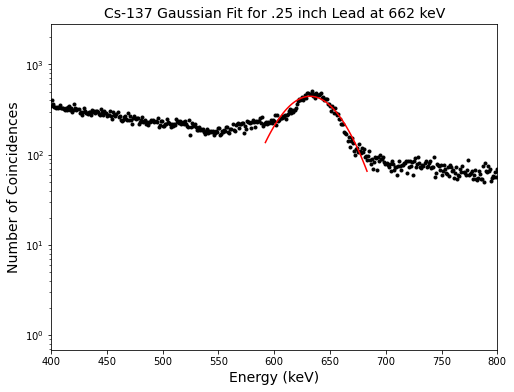

Parameter Values (a,b,c) =  [443.4723578  632.12982093  26.07748467]


In [32]:
x_Cs137_Pb2 = Cs137_energyPb2[558:658]  
y_Cs137_Pb2 = Pb2[558:658]
# Range peak for 511 keV

guessPb2 = [700,590,.5] 
Pb2_Param, Pb2_Err = optimize.curve_fit(Gauss,x_Cs137_Pb2,y_Cs137_Pb2,p0 = guessPb2) 
Pb2fit = Gauss(x_Cs137_Pb2,*Pb2_Param)

plt.figure(figsize = (8,6))
plt.plot(Cs137_energyPb2,Pb2,'.',color = 'k')
plt.plot(x_Cs137_Pb2,Pb2fit,'r',label='Gaussian_Fit') # Plots Gaussian Fit 
plt.title('Cs-137 Gaussian Fit for .25 inch Lead at 662 keV',fontsize = 14)
plt.ylabel('Number of Coincidences',fontsize = 14)
plt.xlabel('Energy (keV)',fontsize = 14)
plt.yscale('log')
plt.xlim(400,800)
plt.show()
print('Parameter Values (a,b,c) = ',Pb2_Param)

## Experimental Result: E = 632.13 $\pm$ 26.07 keV 